In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import boxcox
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('./Output/NEES_summary_with_heliquest.csv')

In [13]:
df_middle = df[(df['Median'] < 1.5) & (df['Median'] > 0.63)]

In [14]:
# A bespoke funtion for plotting
def myplot(df, y):
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=y, data=df, palette="Blues")
    # Add scatter points jittered for better visualization
    sns.stripplot(y=y, data=df, color="black", jitter=True, alpha=0.5)
    # sns.stripplot(x=x, y=y, data=df, order=order, color='black', jitter=True, alpha=0.5)

    plt.tight_layout()
    plt.show()

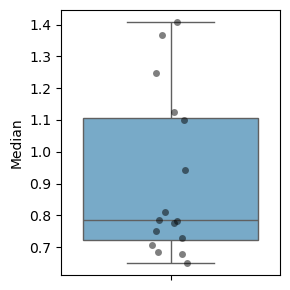

In [15]:
# Original median values
myplot(df=df_middle, y='Median')

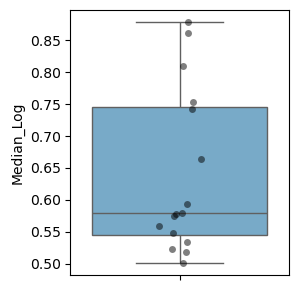

In [16]:
# Log transformation
df_middle["Median_Log"] = np.log1p(df_middle['Median'])
myplot(df=df_middle, y='Median_Log')

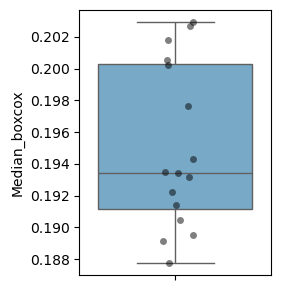

In [17]:
# Box-Cox transformation
shifted_median = df_middle['Median'] + 1  # shift by +1 to ensure all values are positive
boxcox_transformed, _ = boxcox(shifted_median)
df_middle['Median_boxcox'] = boxcox_transformed
myplot(df_middle, y='Median_boxcox')

In [18]:
df_middle.to_csv('./Output/NEES_summary_with_heliquest_Median_Transformed_MiddleNEES.csv', index=False)